In [3]:
import io

def detect_handwritten_ocr(path, verbose=False):
    """Detects handwritten characters in a local image.

    Args:
    path: The path to the local file.
    """
    from google.cloud import vision_v1p3beta1 as vision
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    # Language hint codes for handwritten OCR:
    # en-t-i0-handwrit, mul-Latn-t-i0-handwrit
    # Note: Use only one language hint code per request for handwritten OCR.
    image_context = vision.types.ImageContext(
        language_hints=['en-t-i0-handwrit'])

    response = client.document_text_detection(image=image,
                                              image_context=image_context)

    if verbose:
        print('Full Text: {}'.format(response.full_text_annotation.text))

        for page in response.full_text_annotation.pages:
            for block in page.blocks:
                print('\nBlock confidence: {}\n'.format(block.confidence))

                for paragraph in block.paragraphs:
                    print('Paragraph confidence: {}'.format(
                        paragraph.confidence))

                    for word in paragraph.words:
                        word_text = ''.join([
                            symbol.text for symbol in word.symbols
                        ])
                        print('Word text: {} (confidence: {})'.format(
                            word_text, word.confidence))

                        for symbol in word.symbols:
                            print('\tSymbol: {} (confidence: {})'.format(
                                symbol.text, symbol.confidence))
    
    return response.full_text_annotation.text

In [4]:
try:
    import Image
except ImportError:
    from PIL import Image
import pytesseract

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline

In [6]:
detect_handwritten_ocr('../../data/postits/2823.png')

/Users/sorrosn/.virtualenvs/postit/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/.
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


'#2813\nTag\ndescription\n'

In [42]:
detect_handwritten_ocr('../../data/postits/data_priority_area/notes/note01 [Trust privacy].jpg')

/Users/sorrosn/.virtualenvs/postit/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/.
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


'Men det\n"The Seasid\naf det, is\nnauko pang\nLa sala\nS25\n'

In [9]:
done_text = detect_handwritten_ocr('../../data/postits/done.png')

/Users/sorrosn/.virtualenvs/postit/lib/python3.6/site-packages/google/auth/_default.py:66: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/.
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [10]:
tokens = done_text.split('\n')

board_column = tokens[0]
column_cards = [token for token in tokens if token and '#' in token[0]]

print(board_column)
print(column_cards)

Done
['#2828', '#2839', '#2826', '#2874', '#2562', '#2658', '#116', '#2766']


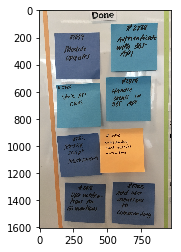

In [12]:
img=Image.open('../../data/postits/done.png')

plt.imshow(np.asarray(img))

In [13]:
done_text.replace('\n', ' ').split('#')

['Done ',
 '2828 ',
 '2839 Module undales Authenticate with 365 AP ',
 '2826 ',
 '2874 Handle events in 365 Api Stere API crets ',
 '2562 select HK script improvement ',
 '2658 understanding event attendee motivations ',
 '116 User notifica tions for @ mention ',
 '2766 Add user mentions commenting ']